In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [33]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared}
    print(data)

In [11]:
df = pd.read_csv("AggregatedData.csv")
random_df = pd.read_csv("RandomAggregatedData.csv")
add_more_info(df)
add_more_info(random_df)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges,nodes_X_edges,log_nodes_X_edges,log_nodes^2
0,0,35,27,11,22,72,71,171,170,92,...,4.799914,93.5,4.537961,8087.75,8.998106,945,6.851185,17091.0,9.746307,9.418330
1,1,59,48,18,38,131,130,124,123,122,...,4.848116,78.5,4.363099,5377.25,8.589932,2832,7.948738,16141.0,9.689118,9.695479
2,1000,63,55,17,31,116,115,151,150,120,...,4.894101,77.5,4.350278,5463.75,8.605891,3465,8.150468,17995.0,9.797849,9.770870
3,1001,39,30,13,23,230,229,109,108,197,...,5.132853,138.5,4.930870,18074.25,9.802244,1170,7.064759,32221.0,10.380374,10.129427
4,1002,34,29,12,19,112,111,146,145,94,...,4.859812,99.0,4.595120,9405.00,9.148997,986,6.893656,16801.0,9.729194,9.702105


In [6]:
df.describe()

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
count,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,...,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,4994.339331,41.313454,35.359749,13.236632,22.219549,130.934095,129.934095,131.343172,130.343172,122.614071,...,4.378045,4.272053,4.796765,9.531871,94.778884,4.433813,10630.297104,8.811857,1698.369655,7.146529
std,2884.664970,17.080235,14.207657,6.166275,13.418341,65.575272,65.575272,65.991883,65.991883,165.450368,...,0.493514,1.010354,0.392974,0.771572,47.094681,0.489414,11151.083571,0.982043,1622.088484,0.724306
min,1.000000,15.000000,14.000000,3.000000,3.000000,48.000000,47.000000,47.000000,46.000000,8.000000,...,1.386294,1.974081,3.931826,7.857481,4.000000,1.386294,16.000000,2.772589,210.000000,5.347108
25%,2494.000000,30.000000,26.000000,9.000000,13.000000,82.000000,81.000000,82.000000,81.000000,33.000000,...,4.025352,3.496508,4.494239,8.938007,59.500000,4.085976,3357.750000,8.119026,756.000000,6.628041
50%,4991.000000,37.000000,32.000000,12.000000,19.000000,112.000000,111.000000,113.000000,112.000000,64.000000,...,4.369448,4.162003,4.757891,9.453287,83.500000,4.424847,6617.250000,8.797435,1155.000000,7.051856
75%,7491.000000,49.000000,41.000000,16.000000,28.000000,162.000000,161.000000,163.000000,162.000000,143.000000,...,4.731803,4.972587,5.078294,10.078994,120.000000,4.787492,13572.000000,9.515764,2009.000000,7.605392
max,10000.000000,144.000000,140.000000,57.000000,115.000000,377.000000,376.000000,379.000000,378.000000,2982.000000,...,5.797576,8.013211,5.912151,11.823992,331.500000,5.803628,109229.250000,11.601204,19740.000000,9.890402


In [45]:
import pyperclip

# pyperclip.copy(",".join(map(lambda x: str(x), list(df2[pd.isnull(df2.avg_time)].name))))
times_names=[f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
names = ['name']
names += times_names
x = df2[pd.isnull(df2.avg_time)][names]
all_data = ''
def fixer(row):
    print(row['name'])
    empty_cell = ''
    for time in reversed(times_names):
        if pd.isna(row[time]):
            empty_cell = time
    empty_row_index = times_names.index(empty_cell)
    data = f'{int(row["name"])} to listOf('
    for i in range(empty_row_index - 2):
        data += f'{int(row[times_names[i]])}, '
    data += '),\n'
    return data


x['data'] = x.apply(fixer, axis = 1)
x['data'].to_csv('x.csv', index=False)

10.0
1021.0
1038.0
11.0
1124.0
1141.0
1170.0
118.0
1206.0
1213.0
1225.0
1256.0
1285.0
1290.0
1303.0
1308.0
1349.0
135.0
1454.0
1472.0
1503.0
1504.0
1508.0
1515.0
1517.0
1570.0
1602.0
1659.0
1692.0
1716.0
1785.0
182.0
1827.0
1860.0
1916.0
1973.0
198.0
1987.0
200.0
2016.0
2019.0
2039.0
2121.0
2135.0
2137.0
2182.0
2195.0
2245.0
2250.0
2293.0
2294.0
2299.0
2318.0
2357.0
2366.0
2373.0
2375.0
2417.0
2468.0
2490.0
2521.0
2522.0
2537.0
2562.0
2594.0
2600.0
2611.0
2613.0
2626.0
2628.0
2629.0
2630.0
2636.0
2654.0
2669.0
2697.0
2736.0
2752.0
2835.0
285.0
2877.0
291.0
293.0
2944.0
2975.0
3.0
3068.0
3128.0
3152.0
3188.0
323.0
3238.0
3242.0
3272.0
3319.0
333.0
3331.0
3338.0
3344.0
338.0
342.0
359.0
3602.0
3616.0
3679.0
3693.0
3752.0
3821.0
3833.0
3882.0
3900.0
394.0
3945.0
3946.0
3948.0
3993.0
4013.0
4023.0
4060.0
4090.0
4094.0
417.0
4194.0
4221.0
4244.0
4245.0
4262.0
4274.0
4275.0
4282.0
429.0
4302.0
4322.0
4330.0
4380.0
4399.0
4459.0
4510.0
4535.0
4566.0
4582.0
4583.0
4603.0
4607.0
4635.0
4679.0
4

In [21]:
fixed = pd.merge(df2[['name', 'generalization_nodes','generalization_edges','generalization_node_variables','generalization_edge_variables','g1_nodes','g1_edges','g2_nodes','g2_edges']], df22[times_names], on='name')
fixed

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,time2,time3,time4,time5,time6,time7,time8,time9,avg_time,std_dev
0,10,80,72,22,36,137,136,229,228,196,...,179,196,185,217,190,217,197,198,197.2,11.487384
1,1021,51,35,19,49,228,227,208,207,365,...,350,378,387,361,346,333,338,337,353.9,17.323106
2,1038,50,24,10,60,221,220,210,209,406,...,446,458,480,450,438,480,470,515,454.7,32.372983
3,11,45,39,11,21,143,142,221,220,174,...,162,168,177,168,170,412,182,177,195.4,72.441977
4,1124,75,54,17,56,166,165,150,149,202,...,196,197,216,214,211,207,200,198,209.7,16.882239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9931,78,63,18,42,252,251,205,204,628,...,643,645,468,660,684,654,427,494,592.6,87.635837
347,9944,57,38,20,52,224,223,330,329,785,...,783,811,830,815,839,819,811,796,806.2,20.306649
348,9951,81,57,24,64,209,208,171,170,376,...,387,365,373,400,424,384,366,427,387.5,21.406775
349,9954,55,49,20,30,174,173,158,157,176,...,164,203,185,200,154,245,179,186,189.7,24.182845


In [40]:
# add_more_info(fixed)
df.to_csv('AggregatedData.csv', index=False)

In [28]:
times_names = [f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
times_names.append('name')
df[df.avg_time.notnull()].sum()[times_names] / 60_000

time0        57.557083
time1        58.573933
time2        58.905567
time3        60.766483
time4        62.504783
time5        63.148417
time6        63.858650
time7        64.584200
time8        65.107967
time9        65.789361
avg_time     60.550171
std_dev       4.447006
name        790.346650
dtype: float64

In [101]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

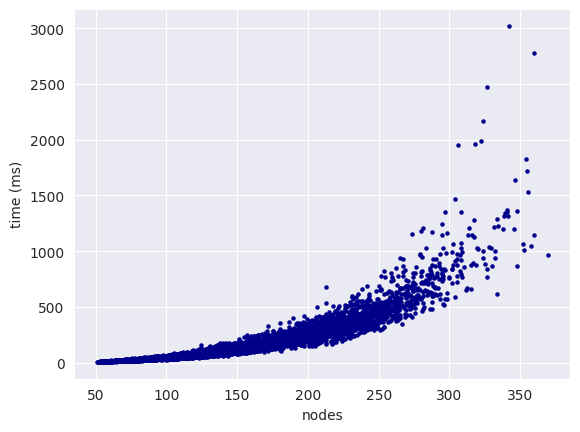

In [7]:
df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

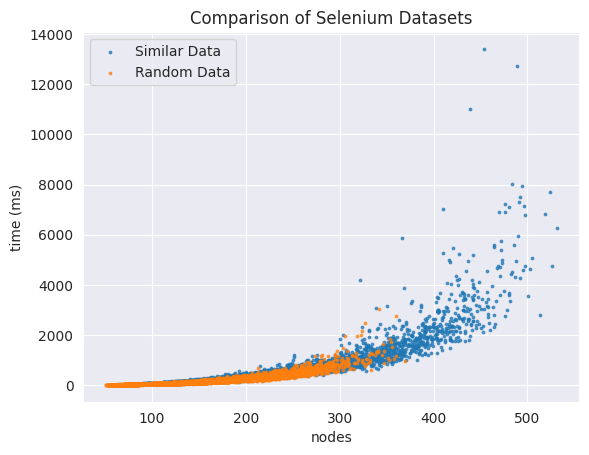

In [14]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(random_df['nodes'], random_df['avg_time'], label='Random Data', s=3, alpha=0.7)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

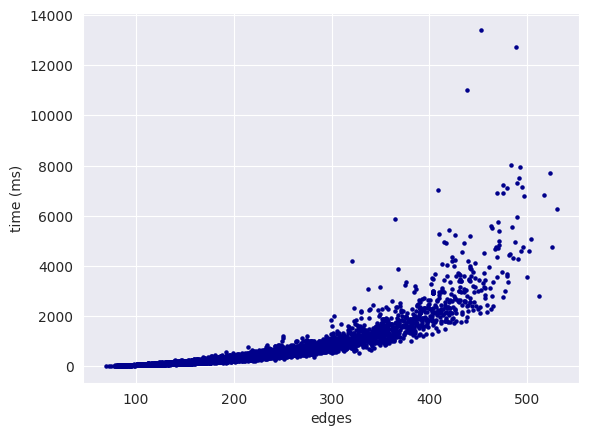

In [88]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

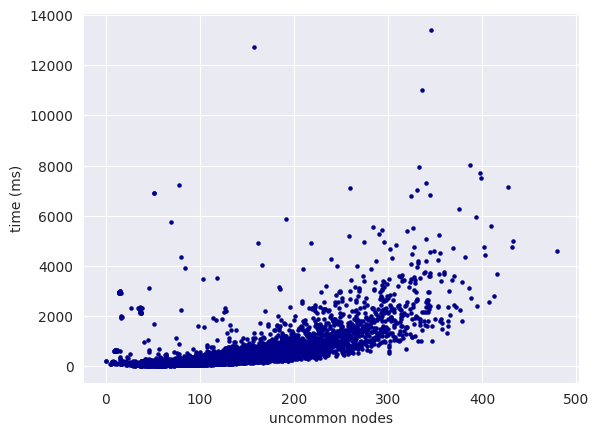

In [89]:
df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

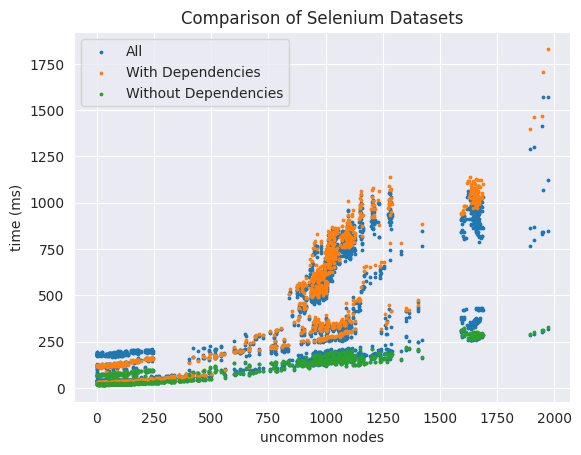

In [43]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

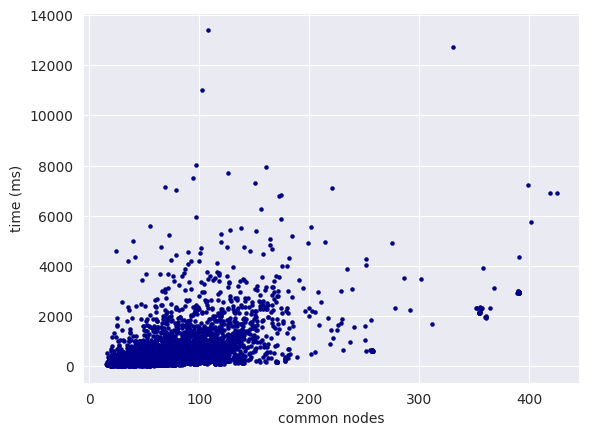

In [91]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='common edges', ylabel='time (ms)'>

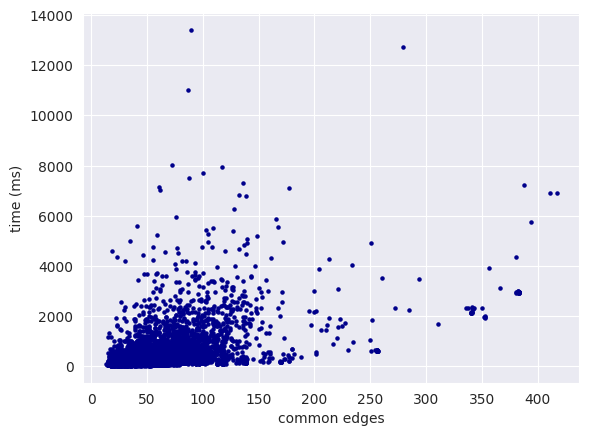

In [92]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

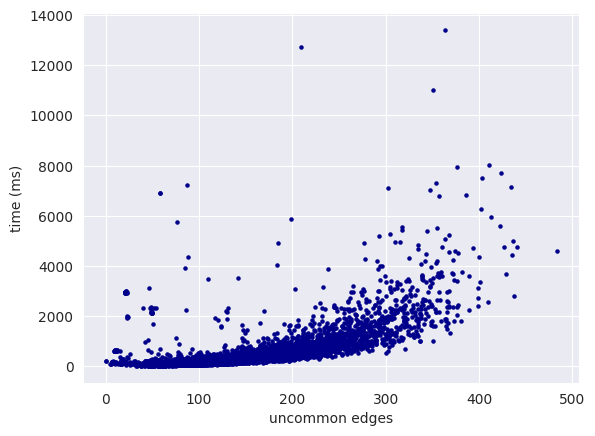

In [93]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

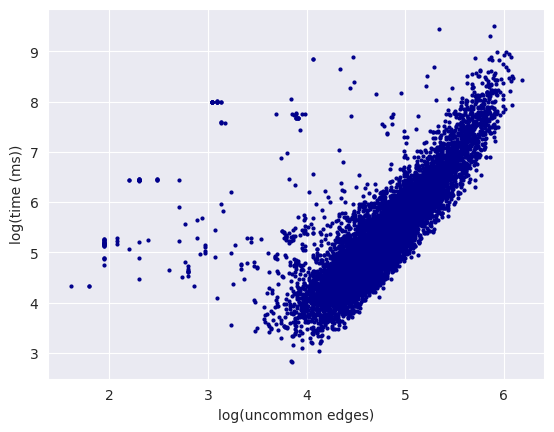

In [94]:
df.plot.scatter(x='log_uncommon_edges', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

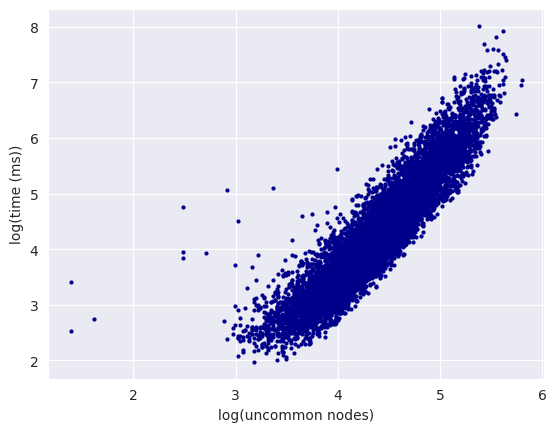

In [8]:
df.plot.scatter(x='log_uncommon_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

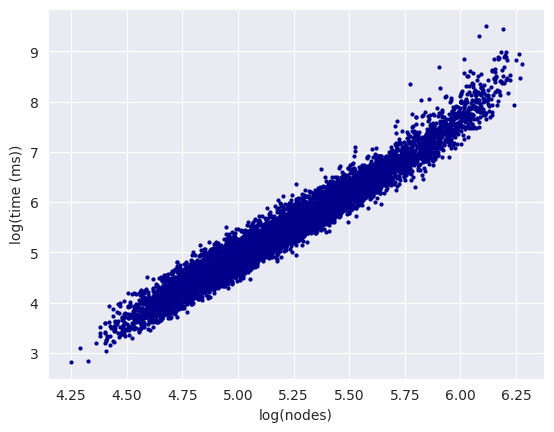

In [97]:
df.plot.scatter(x='log_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

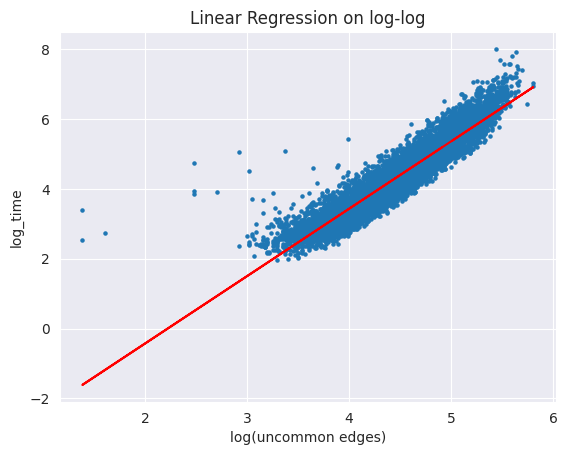

(array([[1.9320466]]), array([-4.29427988]), 0.8758714596636844)

In [9]:
linear_regression_of(df[df['uncommon_nodes'] != 0], 'log_uncommon_edges', 'log_avg_time', x_label='log(uncommon edges)', y_label='log_time', title='Linear Regression on log-log')

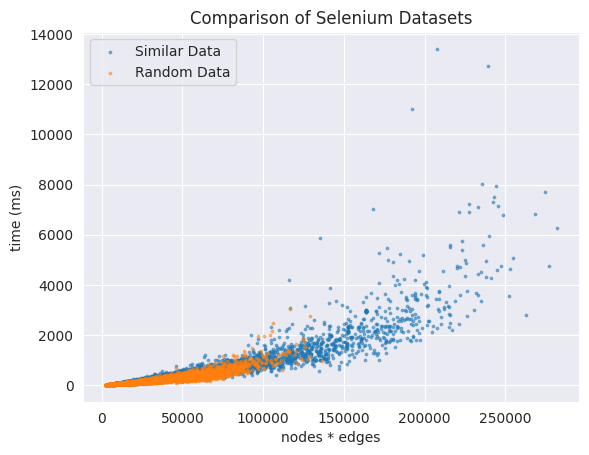

In [37]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='Similar Data', s=3, alpha=0.5)
plt.scatter(random_df['nodes_X_edges'], random_df['avg_time'], label='Random Data', s=3, alpha=0.5)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

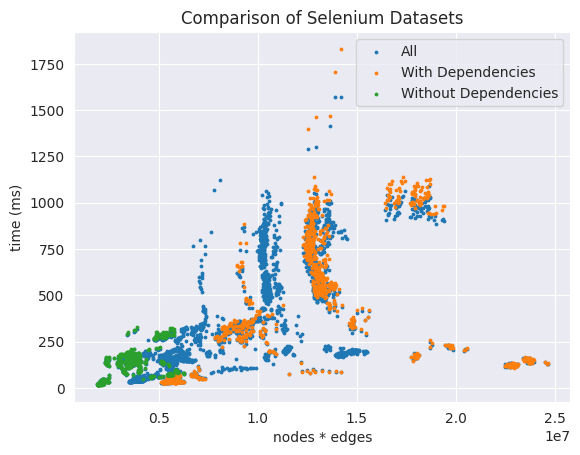

In [55]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes_X_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes_X_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

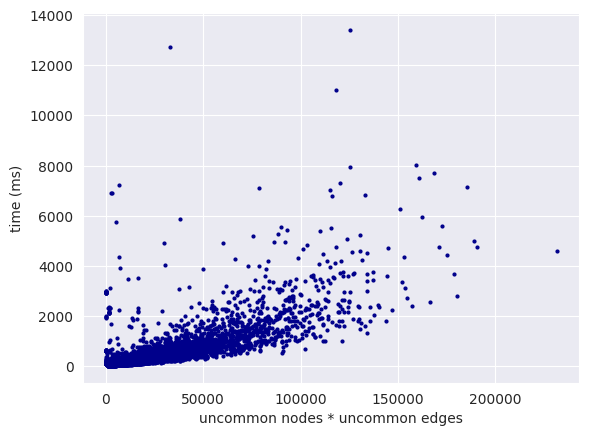

In [100]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

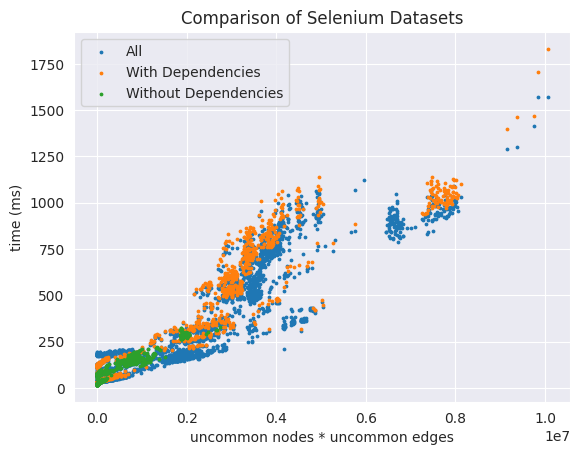

In [57]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

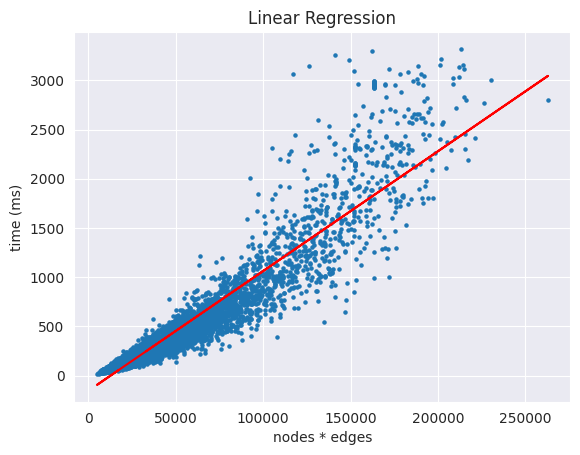

(array([[0.01217279]]), array([-154.56353153]), 0.8863734349331467)

In [16]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]
linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='time (ms)', title='Linear Regression')

/tmp/ipykernel_112610/3501351251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['nodes_X_edges_bins'] = pd.cut(plt_df['nodes_X_edges'], bins=bins, include_lowest=True)


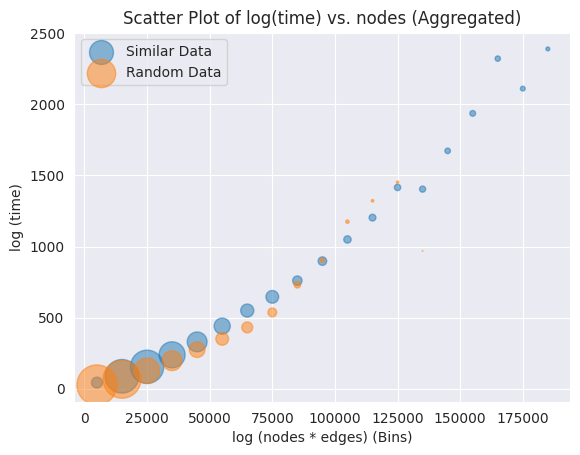

In [20]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 0.0 - 1_000_000
bins = [10_000 * i for i in range(20)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['nodes_X_edges_bins'] = pd.cut(plt_df['nodes_X_edges'], bins=bins, include_lowest=True)
random_df['nodes_X_edges_bins'] = pd.cut(random_df['nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_1_data['nodes_X_edges_bins_numeric'] = grouped_1_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_2_data = random_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_2_data['nodes_X_edges_bins_numeric'] = grouped_2_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_2_data['weights'] = random_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

# grouped_3_data = plt_df.groupby('nodes_bin')['avg_time_x'].mean().reset_index()
# grouped_3_data['nodes_bin_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['avg_time_x'].count().reset_index()['avg_time_x'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_X_edges_bins_numeric'], grouped_1_data['avg_time'], label='Similar Data', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['nodes_X_edges_bins_numeric'], grouped_2_data['avg_time'], label='Random Data', s=grouped_2_data['weights'], alpha=0.5)
# plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['avg_time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('log (nodes * edges) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

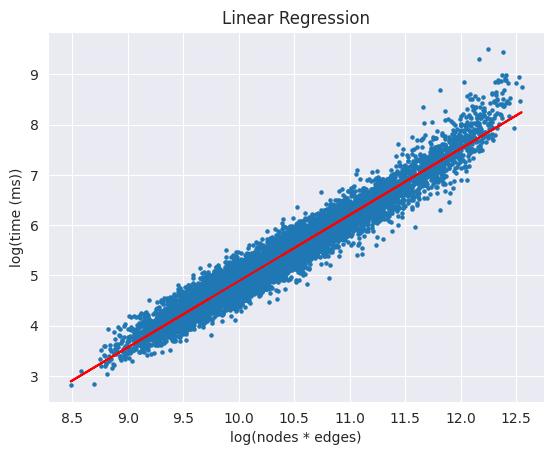

{'coef': array([1.31785674]), 'intercept': -8.292960545863492, 'r_squared': 0.9464821506178782}


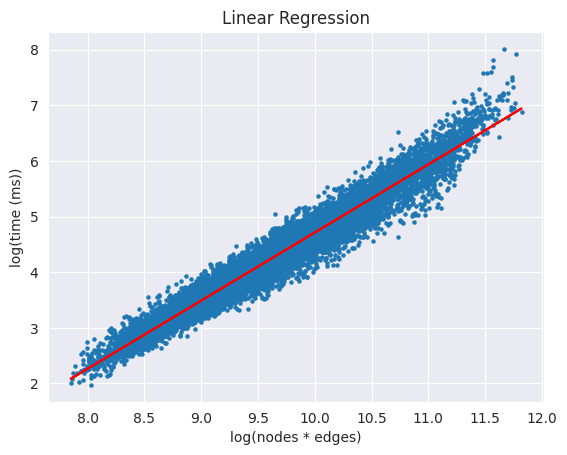

{'coef': array([1.22348158]), 'intercept': -7.52095776327519, 'r_squared': 0.9518952027085408}


{'coef': array([1.22348158]),
 'intercept': -7.52095776327519,
 'r_squared': 0.9518952027085408}

In [25]:
linear_regression_of(df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')
linear_regression_of(random_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')

/tmp/ipykernel_112610/2290100283.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)


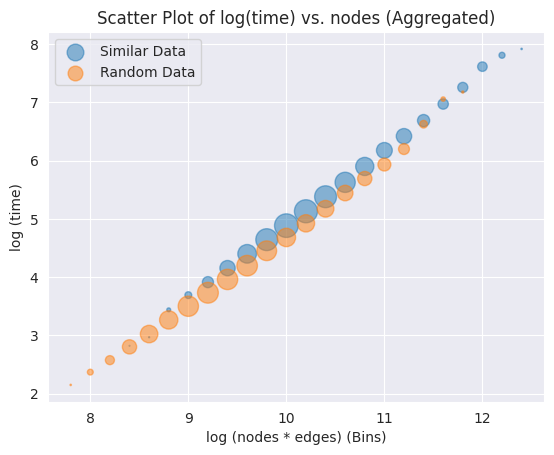

In [29]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 8.5 - 12.5
bins = [7.5 + 0.20 * i for i in range(40)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)
random_df['log_nodes_X_edges_bins'] = pd.cut(random_df['log_nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_1_data['log_nodes_X_edges_bins_numeric'] = grouped_1_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

grouped_2_data = random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_2_data['log_nodes_X_edges_bins_numeric'] = grouped_2_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_2_data['weights'] = random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

# grouped_3_data = plt_df.groupby('nodes_bin')['log_avg_timex'].mean().reset_index()
# grouped_3_data['log_nodes_X_edges_bins_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['log_avg_timex'].count().reset_index()['log_avg_timex'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['log_nodes_X_edges_bins_numeric'], grouped_1_data['log_avg_time'], label='Similar Data', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['log_nodes_X_edges_bins_numeric'], grouped_2_data['log_avg_time'], label='Random Data', s=grouped_2_data['weights'], alpha=0.5)
# plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['log_avg_time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('log (nodes * edges) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

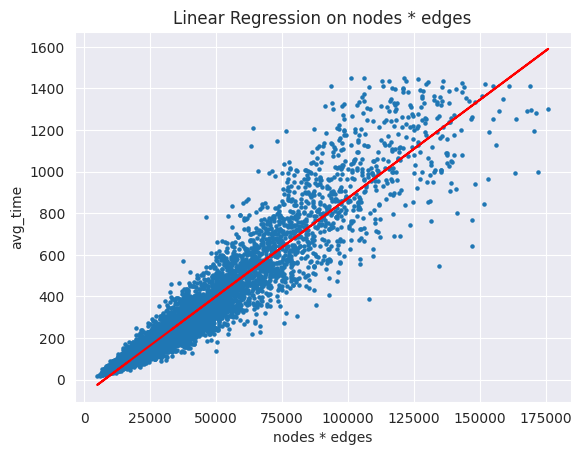

{'coef': 0.00944322735515848, 'intercept': -71.05662889952936, 'r_squared': 0.9044776154029063}


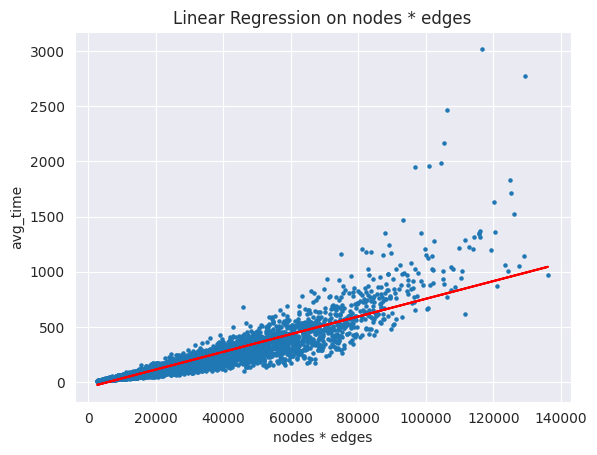

{'coef': 0.008016988896915496, 'intercept': -47.13844795638066, 'r_squared': 0.8219439208116424}


In [51]:
quantile = df['avg_time'].quantile(0.95)
plt_df = df[df['avg_time'] < quantile]

quantile = random_df['avg_time'].quantile(0.99)
random_plt_df = random_df[random_df['avg_time'] < quantile]

linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')
linear_regression_of(random_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

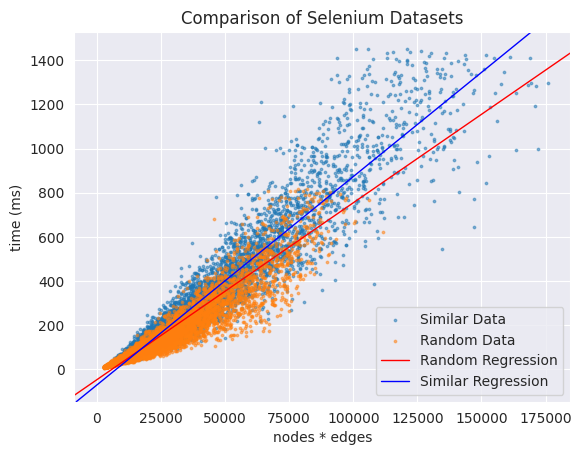

In [52]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_X_edges'], plt_df['avg_time'], label='Similar Data', s=3, alpha=0.5)
plt.scatter(random_plt_df['nodes_X_edges'], random_plt_df['avg_time'], label='Random Data', s=3, alpha=0.5)
plt.axline((0, -47.13844795638066), (47.13844795638066/0.008016988896915496, 0), linewidth=1, color='r', label='Random Regression')
plt.axline((0, -71.05662889952936), (71.05662889952936/0.00944322735515848, 0), linewidth=1, color='b', label='Similar Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()